In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier                                #KNN-method calling 
from sklearn.svm import SVC                                                       #SVM
from sklearn.linear_model import LogisticRegression                               #Logistic regression
from sklearn.naive_bayes import GaussianNB                                        #Naive Bayes
from sklearn import tree                                                          #Decision tree
from sklearn.ensemble import RandomForestClassifier                               #Random forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [2]:
data = pd.read_csv("/kaggle/input/iris/Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


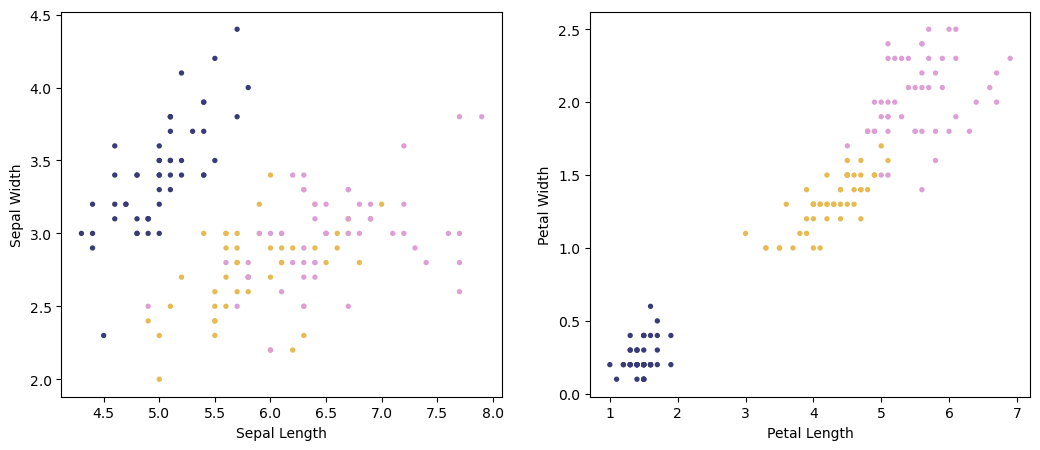

In [3]:
fig, ax = plt.subplots(figsize=(12.5,5), nrows=1, ncols=2)         #visualization of two different data dependencies

ax[0].scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=pd.factorize(data['Species'])[0], s=8, cmap='tab20b')
ax[0].set_xlabel('Sepal Length')
ax[0].set_ylabel('Sepal Width')
ax[1].scatter(data['PetalLengthCm'], data['PetalWidthCm'], c=pd.factorize(data['Species'])[0], s=8, cmap='tab20b')
ax[1].set_xlabel('Petal Length')
ax[1].set_ylabel('Petal Width')
plt.show()

In [4]:
train, val = train_test_split(data, test_size=0.2)                #dividing data into training and validation sub-samples 

In [5]:
X_train = train.drop('Species', axis=1)                                        #splitting the data on features and labels
y_train = train['Species']
X_val = val.drop('Species', axis=1)
y_val = val['Species']

In [26]:
clf_1 = KNeighborsClassifier(n_neighbors=5)                                                #KNN
clf_1.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
print(f'accuracy: {accuracy_score(y_val, clf_1.predict(X_val))}')

accuracy: 1.0


In [8]:
clf_2 = SVC(kernel='linear')                                                                #SVM
clf_2.fit(X_train, y_train)

SVC(kernel='linear')

In [9]:
print(f'accuracy: {accuracy_score(y_val, clf_2.predict(X_val))}')

accuracy: 1.0


In [10]:
clf_3 = LogisticRegression(random_state=0)                                                  #Logistic regression
clf_3.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [11]:
print(f'accuracy: {accuracy_score(y_val, clf_3.predict(X_val))}')

accuracy: 1.0


In [12]:
clf_4 = GaussianNB()                                                                        #Naive Bayes
clf_4.fit(X_train, y_train)

GaussianNB()

In [13]:
print(f'accuracy: {accuracy_score(y_val, clf_4.predict(X_val))}')

accuracy: 1.0


In [14]:
clf_5 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)                      #decision tree
clf_5.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
print(f'accuracy: {accuracy_score(y_val, clf_5.predict(X_val))}')

accuracy: 0.9666666666666667


In [16]:
clf_6 = RandomForestClassifier(criterion='entropy')                                         #random forest
parametr = {'n_estimators':[4,5,6], 'max_depth':[1,2]}

In [17]:
from sklearn.model_selection import GridSearchCV
gridsearchCV_clf = GridSearchCV(clf_6, parametr, cv=5)
gridsearchCV_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_depth': [1, 2], 'n_estimators': [4, 5, 6]})

In [18]:
gridsearchCV_clf.best_params_

{'max_depth': 2, 'n_estimators': 6}

In [19]:
best_clf = gridsearchCV_clf.best_estimator_
print(f'accuracy: {best_clf.score(X_val, y_val)}')

accuracy: 0.9666666666666667
